## Caso de Negocio

Una empresa de venta de productos varios, principalmente alimentos, busca identificar a sus clientes de alto valor. Estos son clientes que generan mayores ingresos y, por tanto, representan un segmento clave para las estrategias de marketing y retención.

Se busca identificar y predecir cuáles clientes pertenecen al segmento de "alto valor" con base a sus características demográficas utilizando el algoritmo de clasificación KNN y árboles de decisión.

### 0. Preparación de Ambiente

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression

### 1. EDA

#### Cargar Dataframe

In [3]:
#Carga del dataframe
df = pd.read_csv('data/sales-transactions.csv', encoding='latin-1')

#Tamaño del dataset
print(df.shape)

(58903, 32)


#### Explorando el dataframe

In [4]:
# Información básica sobre los datos
df.info()

# Estadísticas descriptivas de los datos
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58903 entries, 0 to 58902
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector         58903 non-null  object 
 1   Tipo           58903 non-null  object 
 2   Linea          58903 non-null  object 
 3   Sublinea       58903 non-null  object 
 4   Presentacion   58903 non-null  object 
 5   Gramaje        58903 non-null  float64
 6   Empresa        58903 non-null  object 
 7   Año            58903 non-null  int64  
 8   Fecha          58903 non-null  object 
 9   Cliente        58903 non-null  object 
 10  Transaccion    58903 non-null  int64  
 11  Pedido         58903 non-null  int64  
 12  Control        58903 non-null  int64  
 13  Producto       58903 non-null  int64  
 14  Descripcion    58903 non-null  object 
 15  Unidad         58903 non-null  object 
 16  Cantidad       58903 non-null  int64  
 17  Precio         58903 non-null  float64
 18  Precio

,Gramaje,Año,Transaccion,Pedido,Control,Producto,Cantidad,Precio,Precio_Max,Dif_PrecioMax,Importe,Clave_Cliente,No._Hijos,Antiguedad,Edad
count,58903.000000,58903.000000,58903.000000,58903.000000,5.890300e+04,5.890300e+04,58903.000000,58903.000000,58903.000000,58903.000000,58903.000000,58903.000000,58903.000000,58903.000000,58903.000000
mean,0.422715,2015.094715,566993.296182,95670.198224,1.815129e+06,1.815129e+06,1.687656,40.852449,47.909220,7.056769,63.332720,159770.425140,0.471266,8.516663,37.206271
std,0.523643,0.810848,13311.308168,13436.469024,1.111146e+07,1.111146e+07,2.181921,141.596259,154.455908,43.412498,373.341029,33553.013866,0.982056,5.822291,7.681939
min,0.030000,2014.000000,542421.000000,70855.000000,1.200000e+01,1.200000e+01,1.000000,2.200000,2.500000,0.000000,2.400000,100167.000000,0.000000,0.000000,23.000000
25%,0.200000,2014.000000,555513.000000,84080.000000,8.050000e+02,8.050000e+02,1.000000,15.500000,17.500000,0.000000,20.000000,128760.000000,0.000000,5.000000,31.000000
50%,0.300000,2015.000000,567352.000000,96128.000000,7.446000e+03,7.446000e+03,1.000000,28.000000,31.000000,1.300000,33.000000,160551.000000,0.000000,7.000000,37.000000
75%,0.450000,2016.000000,579254.000000,108005.000000,9.008000e+03,9.008000e+03,2.000000,38.000000,42.500000,4.000000,48.000000,187280.000000,0.000000,11.000000,42.000000
max,15.800000,2016.000000,588519.000000,117442.000000,7.009002e+07,7.009002e+07,165.000000,6000.000000,6000.000000,800.000000,38500.000000,230503.000000,8.000000,38.000000,63.000000


In [5]:
df.head()

,Sector,Tipo,Linea,Sublinea,Presentacion,Gramaje,Empresa,Año,Fecha,Cliente,...,No._Hijos,Antiguedad,Edad,Edad_Rango,Escolaridad,Estado_Civil,Estado,Sexo,Funcion,Grupo
0,BEBIDAS,TIPO OAX,DIVERSOS,ISOTONICAS,INDIVIDUAL,0.6,957936 ALFA TORRE,2014,17-01-14,149580 ANDRES G,...,0,11,35,30 - 39,Sin asignar,Soltero,Nuevo Leon,Masculino,PROFESIONISTA,EJECUTIVOS
1,BEBIDAS,TIPO OAX,DIVERSOS,ISOTONICAS,INDIVIDUAL,0.6,957936 ALFA TORRE,2014,17-01-14,149580 ANDRES G,...,0,11,35,30 - 39,Sin asignar,Soltero,Nuevo Leon,Masculino,PROFESIONISTA,EJECUTIVOS
2,BEBIDAS,TIPO OAX,DIVERSOS,ISOTONICAS,INDIVIDUAL,0.6,957936 ALFA TORRE,2014,17-01-14,149580 ANDRES G,...,0,11,35,30 - 39,Sin asignar,Soltero,Nuevo Leon,Masculino,PROFESIONISTA,EJECUTIVOS
3,BEBIDAS,TIPO OAX,DIVERSOS,ISOTONICAS,INDIVIDUAL,0.6,957936 ALFA TORRE,2014,17-01-14,149580 ANDRES G,...,0,11,35,30 - 39,Sin asignar,Soltero,Nuevo Leon,Masculino,PROFESIONISTA,EJECUTIVOS
4,BEBIDAS,TIPO OAX,DIVERSOS,ISOTONICAS,INDIVIDUAL,0.6,957936 ALFA TORRE,2014,22-01-14,100861 MARIA DE,...,0,15,41,40 - 49,Sin asignar,Soltero,Nuevo Leon,Femenino,EMPLEADO A,EMPLEADOS


### 2. EDA

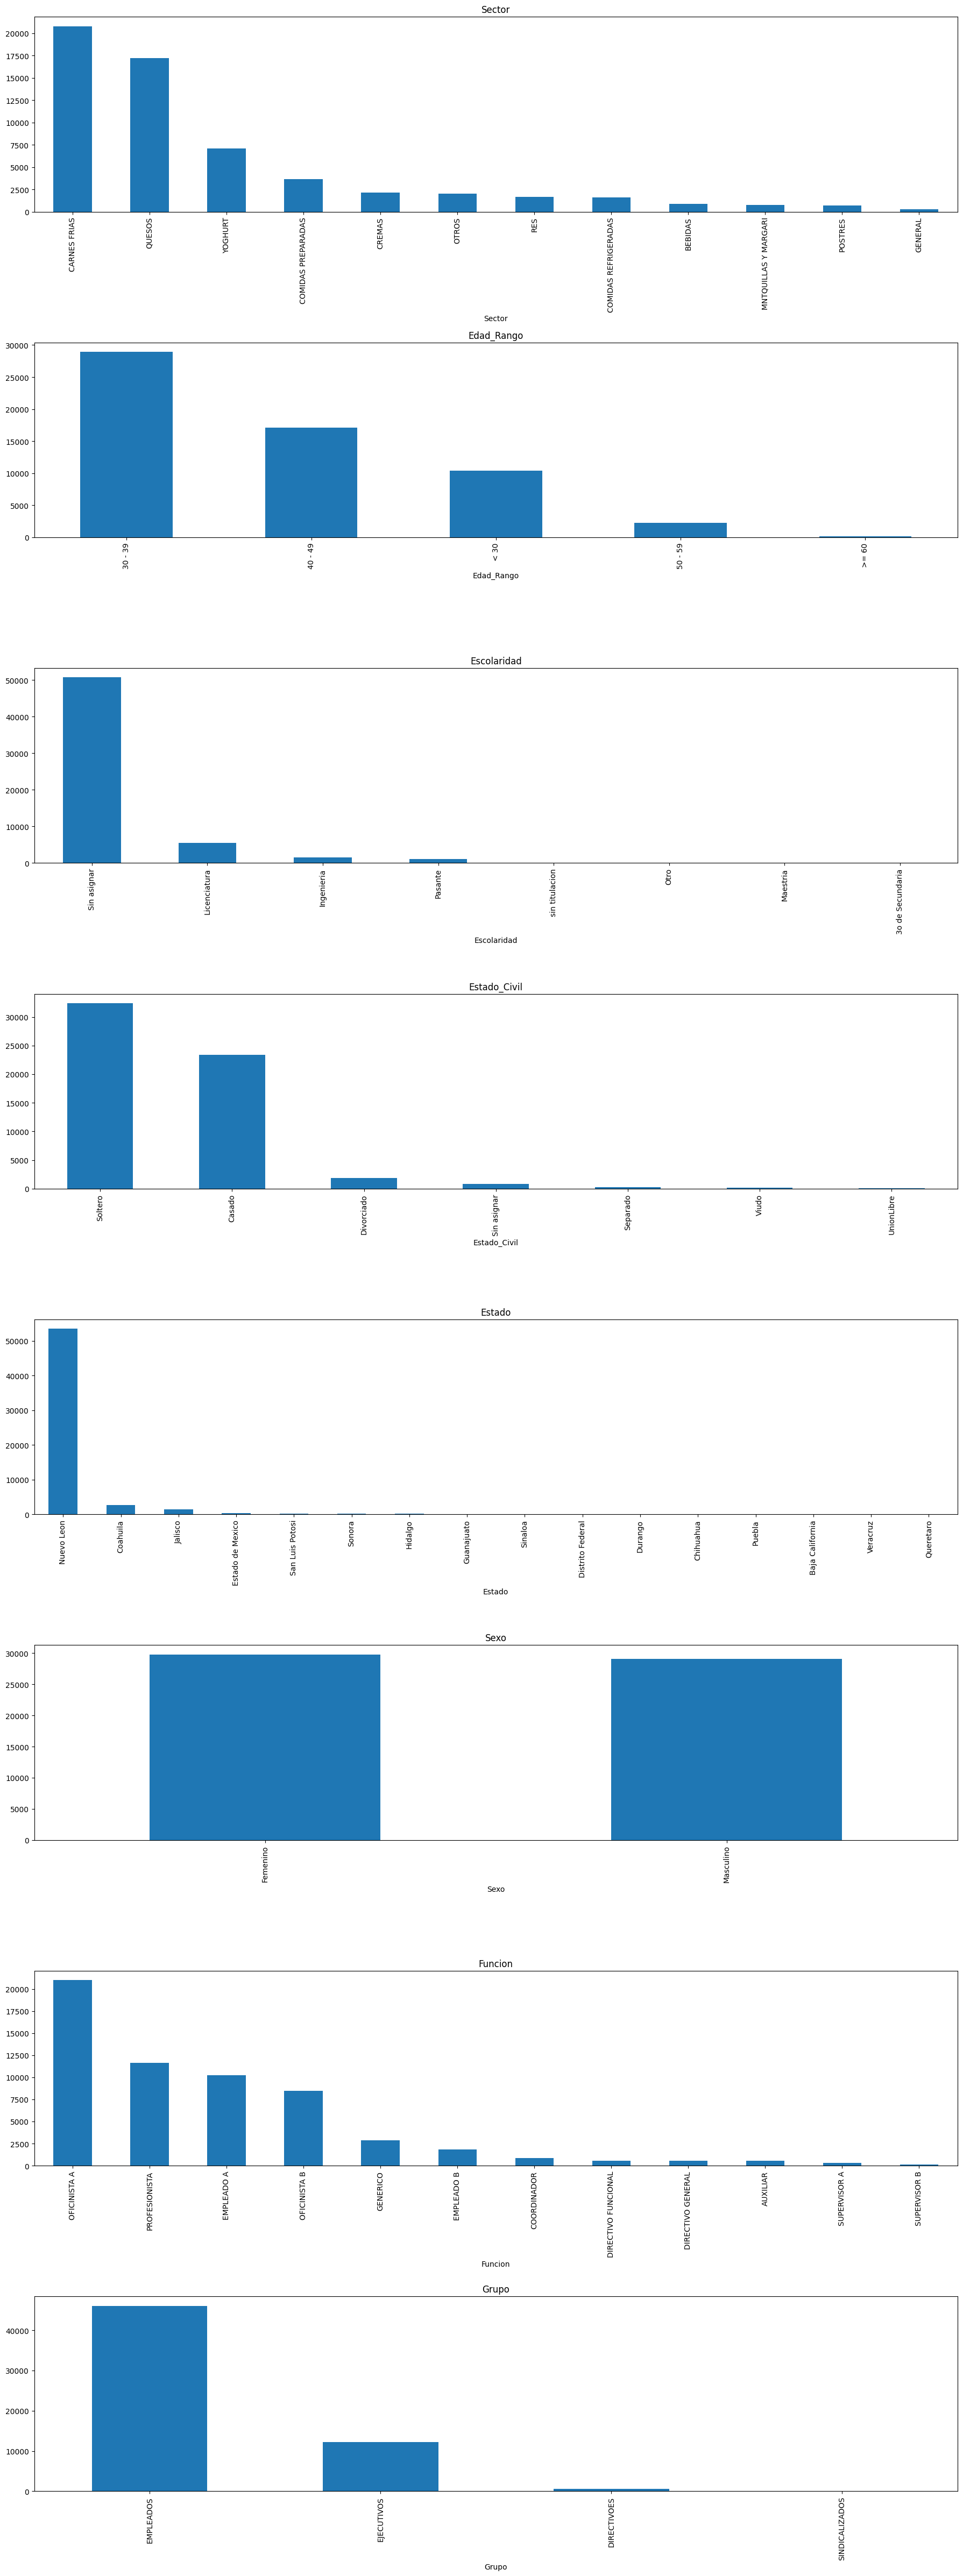

In [22]:
import matplotlib.pyplot as plt

# Lista de variables
variables = ['Sector','Edad_Rango','Escolaridad', 'Estado_Civil', 'Estado', 'Sexo', 'Funcion', 'Grupo']

# Número de gráficos por fila
num_cols = 1
num_rows = (len(variables) + num_cols - 1) // num_cols  # Calcula el número de filas necesarias

# Crear una figura con subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))
axes = axes.flatten()  # Aplana el arreglo de ejes para iterar fácilmente

# Iterar sobre cada variable y crear un histograma
for i, var in enumerate(variables):
    df[var].value_counts().plot(kind='bar', ax=axes[i])  # Cambia a bar plot si es categórico
    axes[i].set_title(var)
    axes[i].tick_params(axis='x', rotation=90)  # Rotar los xticks a 90 grados

# Eliminar ejes vacíos si hay menos gráficos que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()


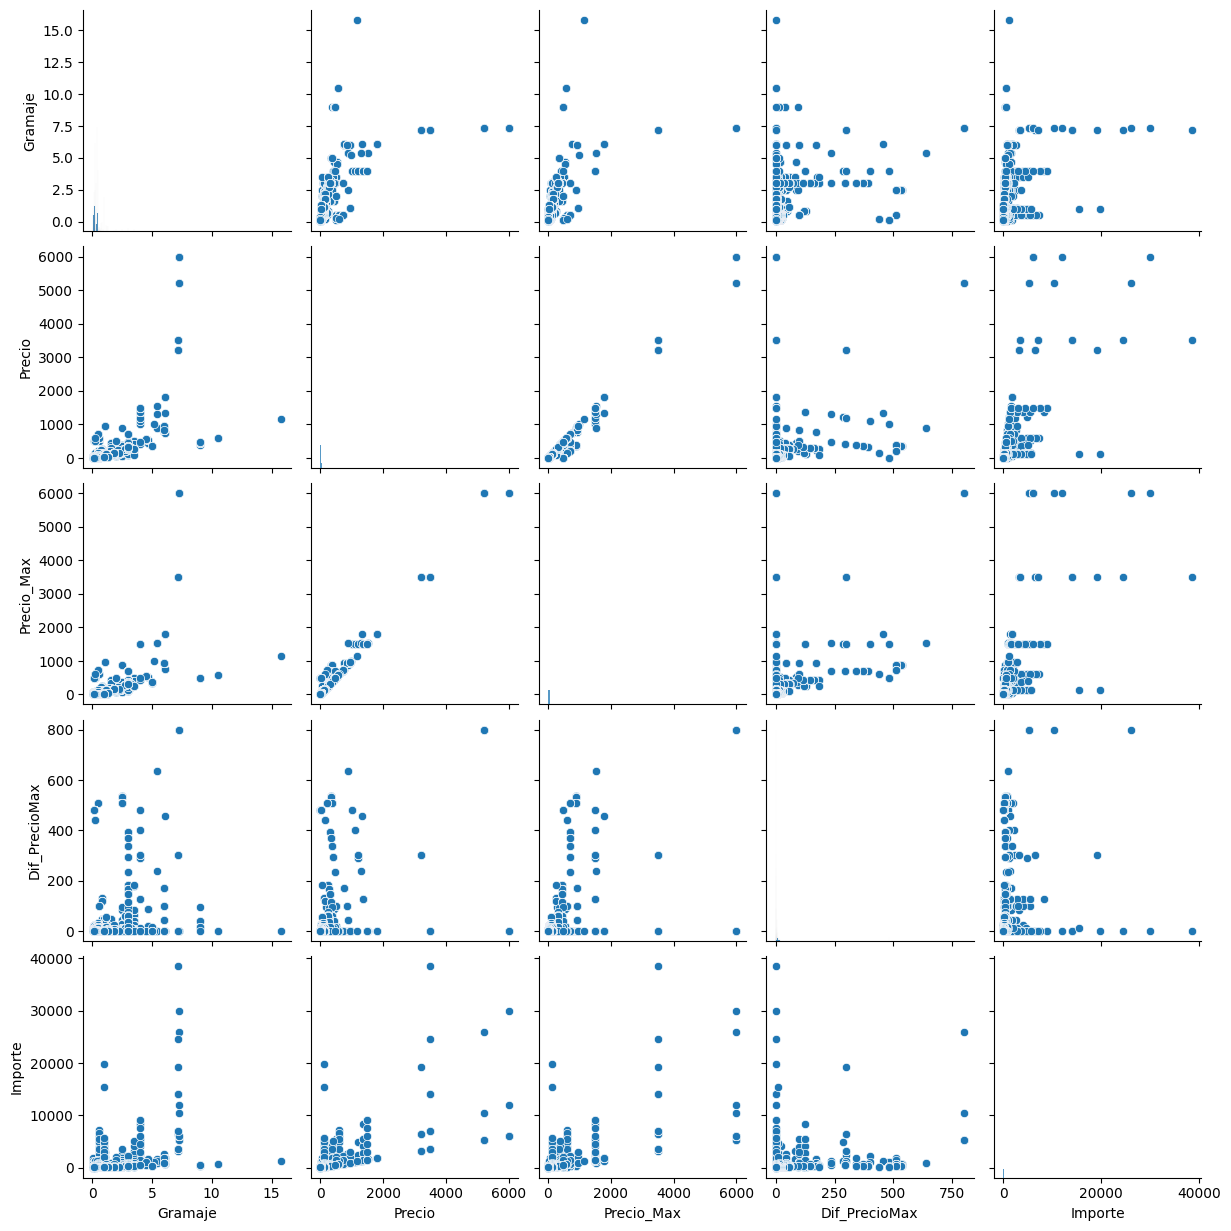

In [25]:
df.select_dtypes(float)
import seaborn as sns
sns.pairplot(df[['Gramaje', 'Precio', 'Precio_Max', 'Dif_PrecioMax', 'Importe']])
plt.show()


### 3. Selección de Variables

Los clientes de alto valor son aquellos que, en su historial de transacciones, tienen un importe total acumulado de compras dentro del 25% superior de todos los clientes y han realizado 10 o más compras. Esto significa que además de generar un alto volumen de ingresos, son clientes recurrentes.
* Variable objetivo:
Cliente_Alto_Valor: Binaria (1 = Cliente de alto valor, 0 = Cliente estándar).

In [31]:
# Agrupar por cliente para obtener el importe total que ha gastado y la cantidad de pedidos que ha hecho
clientes = df.groupby('Clave_Cliente').agg(
    Importe_Total=('Importe', 'sum'),         # Sumar el importe de todos los pedidos del cliente
    Num_Compras=('Transaccion', 'count'),     # Contar el número de pedidos del cliente
    Edad=('Edad', 'mean'),                    # Promediar la edad del cliente
    Antiguedad=('Antiguedad', 'mean')         # Promediar la antigüedad del cliente
).reset_index()

#Umbral para clientes de alto valor (percentil 75)
umbral_alto_valor = np.percentile(clientes['Importe_Total'], 75)

# Crear la variable objetivo: 1 si el cliente es de alto valor y ha hecho más de 10 compras, 0 si no lo es
clientes['Cliente_Alto_Valor'] = np.where((clientes['Importe_Total'] >= umbral_alto_valor) & (clientes['Num_Compras'] > 10), 1, 0)

### 4. Modelos de Clasificación

In [47]:
x_train, x_test, y_train, y_test = train_test_split(clientes.drop(columns=['Cliente_Alto_Valor','Clave_Cliente']),
                                                    clientes['Cliente_Alto_Valor'],
                                                    test_size=0.3)

#### 3.1 Decision Trees

In [49]:
model_1 = DecisionTreeClassifier(criterion='entropy')

model_1.fit(x_train,y_train)
predictions_1 = model_1.predict(x_test)

[Text(0.4, 0.8333333333333334, 'x[0] <= 8711.97\nentropy = 0.826\nsamples = 366\nvalue = [271, 95]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 267\nvalue = [267, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 13.5\nentropy = 0.244\nsamples = 99\nvalue = [4, 95]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 95\nvalue = [0, 95]')]

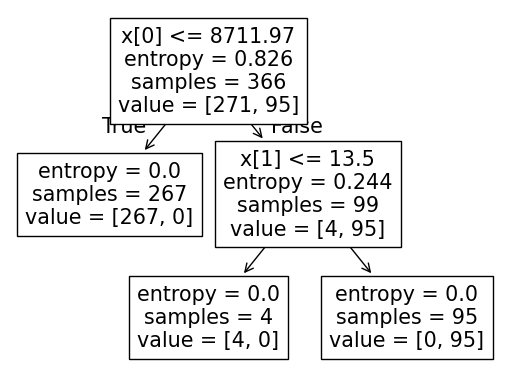

In [54]:
plot_tree(model_1)

In [55]:
confusion_matrix(y_test,predictions_1)

array([[130,   0],
       [  1,  27]])

#### 3.2 Random Forest

#### 3.3 SVM

#### 3.4 Logistic Regresion

In [65]:
model_4 = LogisticRegression(solver='lbfgs')
model_4.fit(x_train,y_train)

predictions_4 = model_4.predict(x_test)

In [67]:
confusion_matrix(y_test,predictions_4)

array([[126,   4],
       [  1,  27]])

#### 3.5 KNN

In [77]:
###

### 5. Evaluación de Modelos

#### ROC-Curve

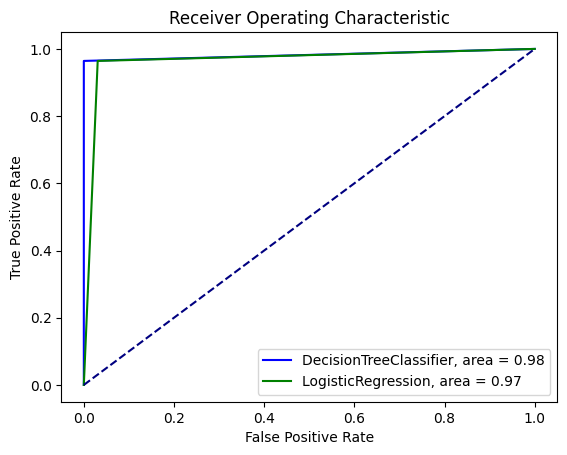

In [78]:
fpr_1, tpr_1, _ = roc_curve(y_test,predictions_1)
fpr_4, tpr_4, _ = roc_curve(y_test,predictions_4)

roc_auc_1 = auc(fpr_1, tpr_1)
roc_auc_4 = auc(fpr_4, tpr_4)

plt.figure()
plt.plot(fpr_1, tpr_1, color='blue', label=f'{model_1.__class__.__name__}, area = {roc_auc_1:.2f}')
plt.plot(fpr_4, tpr_4, color='green', label=f'{model_4.__class__.__name__}, area = {roc_auc_4:.2f}')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
